In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np 


In [2]:
def ICV_rotate(img,theta):
    """ Rotate Function which takes an input image and rotates it by an angle theta
    img : Any image 
    theta: Angle in degree"""
    
    theta = np.deg2rad(theta) 
    h = img.shape[0]
    w = img.shape[1]
    new_height  = int(abs(img.shape[0]*np.cos(theta))+abs(img.shape[1]*np.sin(theta))) #Since the image is rotated by an angle the frame of the image
                                                                                        #needs to be rotated as well by the same angle theta
    new_width  = int(abs(img.shape[1]*np.cos(theta))+abs(img.shape[0]*np.sin(theta)))
    
    rot_mat = np.array([[np.cos(theta),np.sin(theta),0],   #The rotation matrix
               [-np.sin(theta),np.cos(theta), 0],
               [0,0,1]])
    
    trans1= np.array([[1,0,-h//2],                        #To translate the center of the image from left corner to the actual center
                [0,1,-w//2],
                [0,0,1]])
    
    trans2= np.array([[1,0,(new_height//2)],              #To translate the center of the image back to the original center after rotation
               [0,1,(new_width//2)],
               [0,0,1]])
    
   
    img_new= np.zeros((new_height,new_width,img.shape[2]))   
    
    for y in range(h):
        for x in range(w):

            B= np.array([[y],[x],[1]])

            translated_img= (np.matmul(trans1,B))
            # print(T.shape,D.shape,B.shape)
            Rot_img = np.matmul(rot_mat,translated_img)
           
            Tb= (np.matmul(trans2,Rot_img))
            
            assert Tb.shape == (3,1)

            x_new=int(Tb[1].item())
            y_new = int(Tb[0].item())
            assert type(x_new) == int
            
            
            # new_pixel = img[y,x,:]
            if 0 <= x_new < new_width and 0 <= y_new < new_height and x_new>=0 and y_new>=0:
                img_new[int(y_new),int(x_new),:] = img[y,x,:]
    return img_new

In [5]:
def ICV_shear(img,theta):
    
    theta = np.deg2rad(theta)
    h = img.shape[0]
    w = img.shape[1]
    # new_height  = int(abs(img.shape[0]*np.cos(theta))+abs(img.shape[1]*np.sin(theta)))
    # new_width  = int(abs(img.shape[1]*np.cos(theta))+abs(img.shape[0]*np.sin(theta)))
    new_width = int(w+ h*np.tan(theta))
    shear_mat = np.array([[1,0,0],
               [np.sin(theta),1, 0],
               [0,0,1]])
   
    
   
    img_new= np.ones((h,new_width,img.shape[2]))
    for y in range(h):
        for x in range(w):

            B= np.array([[y],[x],[1]])
          
            shear_img = np.matmul(shear_mat,B)
           
            Tb= shear_img #(np.matmul(trans2,Rot_img))
            
            assert Tb.shape == (3,1)

            x_new=int(Tb[1].item()) 
            y_new = int(Tb[0].item())
            assert type(x_new) == int
            
            
            # new_pixel = img[y,x,:]
            if 0 <= x_new < new_width and 0 <= y_new < h and x_new>=0 and y_new>=0:
                img_new[int(y_new),int(x_new),:] = img[y,x,:]
    return img_new

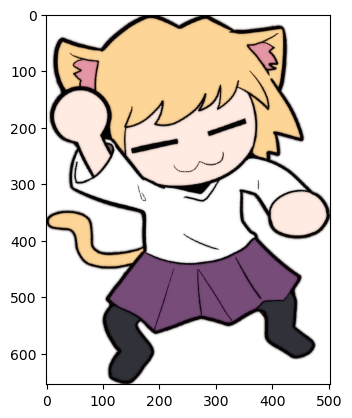

In [6]:
image = plt.imread("./Dataset/necoarc.png")
plt.imshow(image)

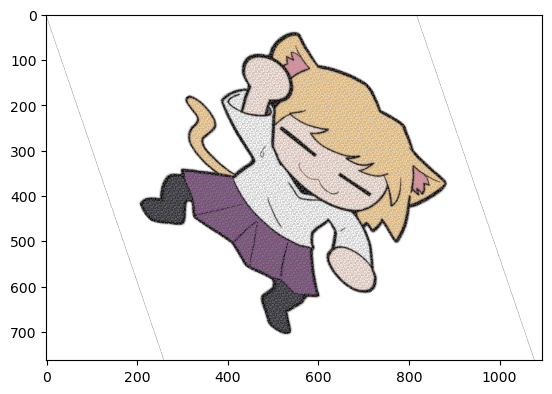

In [7]:
"""Question 1 Part a
Input an Image, rotate it by Theta1 and skew it by Theta2"""
rotated_img = ICV_rotate(image,60)
Resultant = ICV_shear(rotated_img, 20)
plt.imshow(Resultant)

In [8]:
"""Question 1 Part b 
 Write name on the image then rotate and skew it by given angles"""


'Question 1 Part b \n Write name on the image then rotate and skew it by given angles'

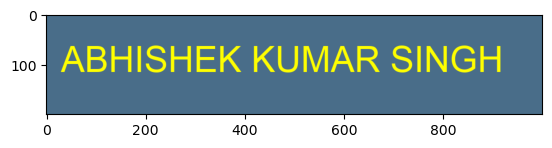

In [9]:
from PIL import Image, ImageDraw, ImageFont
 
img = Image.new('RGB', (1000, 200), color = (73, 109, 137))
 
fnt = ImageFont.truetype('arial.ttf', 72)
d = ImageDraw.Draw(img)
d.text((30,50), "ABHISHEK KUMAR SINGH", font=fnt, fill=(255, 255, 0))
plt.imshow(img) 
img.save('arial_name.png')

image = plt.imread("arial_name.png")
plt.savefig('./Dataset/Name.png')

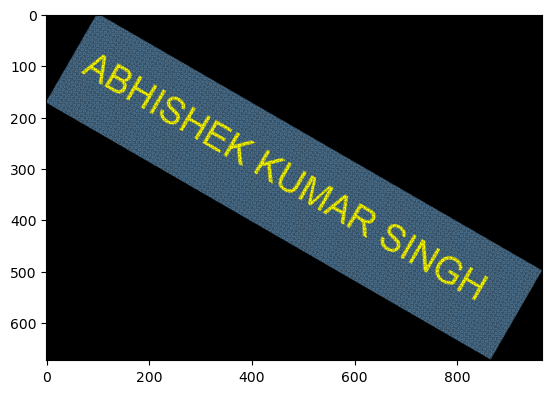

In [10]:
shear_rot2=ICV_rotate(ICV_shear(image,0),30)
plt.imshow(shear_rot2)
#As we can see that image is full of holes and artifacts we will create functions that performs inverse mapping instead of forward mapping


In [11]:
def ICV_new_rotate(img,theta):
    """Rotate function with Inverse mapping to prevent aliasing and fill the holes"""
    theta = np.deg2rad(theta)
    h = img.shape[0]
    w = img.shape[1]
    new_height  = int(abs(img.shape[0]*np.cos(theta))+abs(img.shape[1]*np.sin(theta)))
    new_width  = int(abs(img.shape[1]*np.cos(theta))+abs(img.shape[0]*np.sin(theta)))
    rot_mat = np.array([[np.cos(theta),-np.sin(theta),0],
               [np.sin(theta),np.cos(theta), 0],
               [0,0,1]])
    
    trans1= np.array([[1,0,h//2],
                [0,1,w//2],
                [0,0,1]])
    trans2= np.array([[1,0,-(new_height//2)],
               [0,1,-(new_width//2)],
               [0,0,1]])
    
   
    img_new= np.zeros((new_height,new_width,img.shape[2]))
    for y in range(new_height):
        for x in range(new_width):

            B= np.array([[y],[x],[1]])

            translated_img= (np.matmul(trans2,B))
            # print(T.shape,D.shape,B.shape)
            Rot_img = np.matmul(rot_mat,translated_img)
           
            Tb= (np.matmul(trans1,Rot_img))
            
            assert Tb.shape == (3,1)

            x_new=int(Tb[1].item())
            y_new = int(Tb[0].item())
            assert type(x_new) == int
            
            
            # new_pixel = img[y,x,:]
            if 0 <= x_new < w and 0 <= y_new < h and x_new>=0 and y_new>=0:
                img_new[y,x,:] = img[int(y_new),int(x_new),:]
    return img_new

In [12]:
def ICV_new_shear(img,theta):
    """Shear function with inverse mapping"""
    theta = np.deg2rad(theta)
    h = img.shape[0]
    w = img.shape[1]
   
    new_width = int(w+ h*np.tan(theta))
    shear_mat = np.array([[1,0,0],
               [-np.sin(theta),1, 0],
               [0,0,1]])
   
    
   
    img_new= np.ones((h,new_width,img.shape[2]))
    for y in range(h):
        for x in range(new_width):

            B= np.array([[y],[x],[1]])
          
            shear_img = np.matmul(shear_mat,B)
           
            Tb= shear_img
            
            assert Tb.shape == (3,1)

            x_new=int(Tb[1].item()) 
            y_new = int(Tb[0].item())
            assert type(x_new) == int
            
            if 0 <= y_new < (h) and 0 <= x_new < (w):
                img_new[y,x,:] = img[int(y_new),int(x_new),:]
            # if 0 <= x < new_width and 0 <= y < h :
            # img_new[y,x,:] = img[int(y_new),int(x_new),:]
            
    return img_new

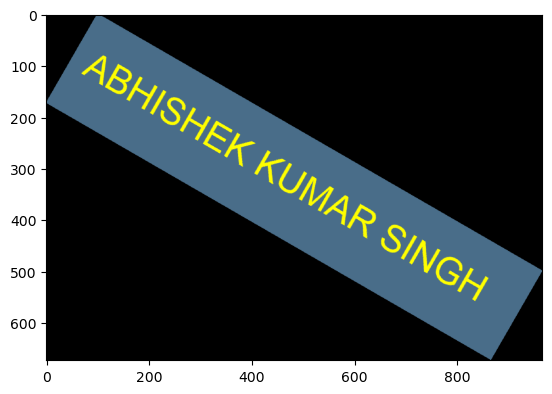

In [13]:
"""Rotate the image by angles i) 30 , ii) 60, iii) 120, iv)-50"""
rot_i = ICV_new_rotate(image,30)
plt.imshow(rot_i)


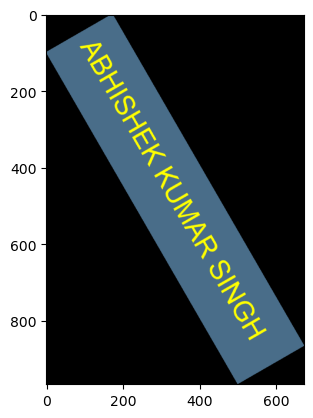

In [14]:
rot_ii = ICV_new_rotate(image,60)
plt.imshow(rot_ii)

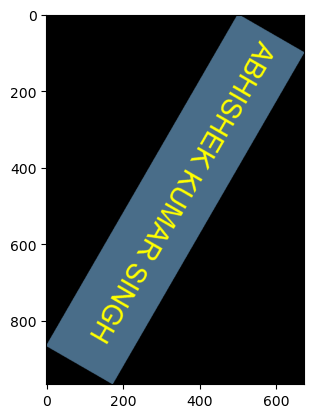

In [15]:
rot_iii = ICV_new_rotate(image,120)
plt.imshow(rot_iii)

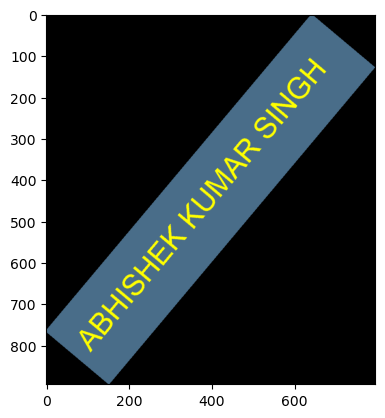

In [16]:
rot_iv = ICV_new_rotate(image,-50)
plt.imshow(rot_iv)

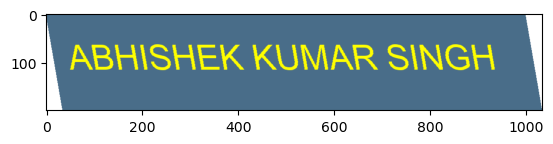

In [17]:
"""Shear the image by angles i) 10 , ii) 40, iii) 60"""
shear_i = ICV_new_shear(image,10)
plt.imshow(shear_i)

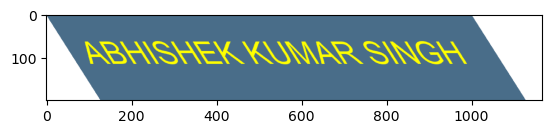

In [18]:
shear_ii = ICV_new_shear(image,40)
plt.imshow(shear_ii)

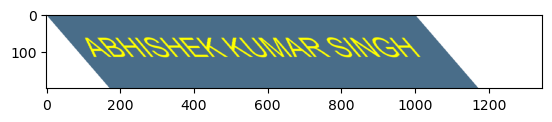

In [19]:
shear_iii = ICV_new_shear(image,60)
plt.imshow(shear_iii)

In [20]:
"""Question 1 Part c 
 Analyse the effect of order of operations of rotate and shear functions on the image 
 i) Rotate the image by 20 and skew by 50
 ii) Skew the image by 50 and rotate by 20"""


'Question 1 Part c \n Analyse the effect of order of operations of rotate and shear functions on the image \n i) Rotate the image by 20 and skew by 50\n ii) Skew the image by 50 and rotate by 20'

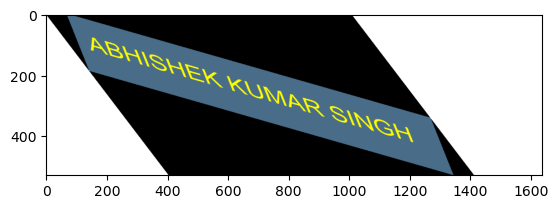

In [21]:
n = ICV_new_shear(ICV_new_rotate(image,20),50) #Rotate and then skew
plt.imshow(n)
plt.savefig('rotate_then_shear.png')

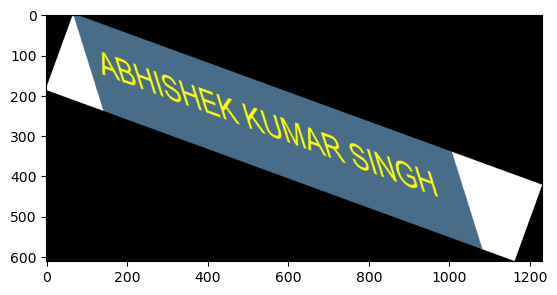

In [22]:
m = ICV_new_rotate(ICV_new_shear(image,50),20)
plt.imshow(m)
plt.savefig('shear_then_rotate.png')